In [1]:
import dlib
from matplotlib import pyplot as plt
import cv2
import pandas as pd
import numpy as onp
import os
import imageio
import jax.numpy as np
import jax
import math

In [2]:
#load attributes csv file
path_csv  = "../../dataset/"
attribute = pd.read_csv(os.path.join(path_csv, "celeba.csv"))

In [3]:
path = "../../dataset/img_celeba_small/"
all_img = [f for f in os.listdir(path) 
                 if os.path.isfile(os.path.join(path, f)) 
                 and f.endswith(".jpg")
                 and not f.startswith(".")]
#all_img = list(map(lambda x: x[2:] if x[0] == '.' else x, all_img))
all_img.sort()

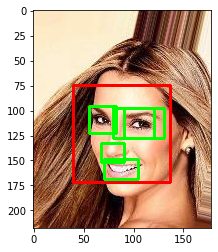

In [4]:
face_cascade = cv2.CascadeClassifier("HaarCascades/face.xml")
eye_cascade = cv2.CascadeClassifier("haarcascades/eye.xml")
nose_cascade = cv2.CascadeClassifier("haarcascades/nose.xml")
mouth_cascade = cv2.CascadeClassifier("haarcascades/mouth.xml")

img = cv2.imread(os.path.join(path, all_img[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
for (x,y,w,h) in faces:        
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_color)
    nose = nose_cascade.detectMultiScale(roi_color)
    mouth = mouth_cascade.detectMultiScale(roi_color)
    
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

for (ex,ey,ew,eh) in nose:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

for (ex,ey,ew,eh) in mouth:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.imshow(img)
plt.show()

In [5]:
def find_vertex(all_img, size):
    face_cascade = cv2.CascadeClassifier("HaarCascades/face.xml")
    eye_cascade = cv2.CascadeClassifier("haarcascades/eye.xml")
    nose_cascade = cv2.CascadeClassifier("haarcascades/nose.xml")
    mouth_cascade = cv2.CascadeClassifier("haarcascades/mouth.xml")
    face_found = []
    eyes_found = []
    nose_found = []
    mouth_found = []

    for k in range(size):
        #load image
        img = cv2.imread(os.path.join(path, all_img[k]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(img)
        eyes = eye_cascade.detectMultiScale(img)
        nose = nose_cascade.detectMultiScale(img)
        mouth = mouth_cascade.detectMultiScale(img)

        not_found = np.array([[np.nan]])

        face_found.append(faces) if faces != () else face_found.append(not_found)
        eyes_found.append(eyes) if eyes != () else eyes_found.append(not_found)
        nose_found.append(nose) if nose != () else nose_found.append(not_found)
        mouth_found.append(mouth) if mouth != () else  mouth_found.append(not_found)

    output = {}    

    temp = [x[0] for x in onp.squeeze(face_found)]
    face_vertex = pd.DataFrame(temp)
    [x,y,h,w] = face_vertex.dropna().mean()
    output["face"] = [x,y,h,w]

    temp = [x[0] for x in onp.squeeze(nose_found)]
    nose_vertex = pd.DataFrame(temp)
    [x,y,h,w] = nose_vertex.dropna().mean()
    output["nose"] = [x,y,h,w]

    temp = [x[0] for x in onp.squeeze(eyes_found)]
    eyes_vertex = pd.DataFrame(temp)
    [x,y,h,w] = eyes_vertex.dropna().mean()
    output["eyes"] = [x,y,h,w]

    temp = [x[0] for x in onp.squeeze(mouth_found)]
    mouth_vertex = pd.DataFrame(temp)
    [x,y,h,w] = mouth_vertex.dropna().mean()
    output["mouth"] = [x,y,h,w]

    return output


In [7]:
def image_area_loader(all_img, size, vertex):
    ceil = [math.ceil(v) for v in vertex ]
    [x,y,w,h] = ceil
        
    img_set= onp.zeros((size, h,w,3))
    
    for k in range(size):
        im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
        im = im[y:y+h,x:x+w,:]
        img_set[k,:,:,:] = im
    
    return img_set

In [6]:
vertex = find_vertex(all_img, 1000)
vertex

C:\Users\willp\AppData\Local\Temp/ipykernel_6100/2391423767.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  face_found.append(faces) if faces != () else face_found.append(not_found)
C:\Users\willp\AppData\Local\Temp/ipykernel_6100/2391423767.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  eyes_found.append(eyes) if eyes != () else eyes_found.append(not_found)
C:\Users\willp\AppData\Local\Temp/ipykernel_6100/2391423767.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  nose_found.append(nose) if nose != () else nose_found.append(not_found)
C:\Users\willp\AppData\Local\Temp/ipykernel_6100/2391423767.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  mouth_found.append(mouth) if mouth != () else  mouth_found.append(not_found)
D:\Applications\Anaconda3\lib\site-packages\numpy\core\_asarray.p

{'face': [36.77376033057851,
  72.11776859504133,
  104.1146694214876,
  104.1146694214876],
 'nose': [72.24167561761547,
  122.88399570354457,
  30.007518796992482,
  24.867883995703544],
 'eyes': [67.70154185022027,
  98.07268722466961,
  26.61123348017621,
  26.61123348017621],
 'mouth': [67.97061803444782,
  136.40729483282675,
  39.660587639311046,
  23.659574468085108]}

In [13]:
face_set= image_area_loader(all_img, 1000, vertex['face'])

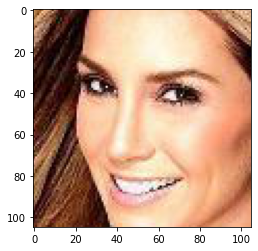

In [15]:
plt.imshow(face_set[0]/255.)
plt.show()

In [17]:
nose_set= image_area_loader(all_img, 1000, vertex['nose'])

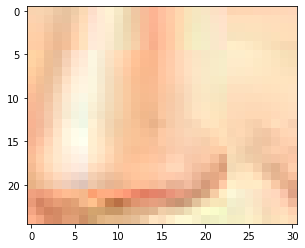

In [18]:
plt.imshow(nose_set[0]/255.)
plt.show()

In [123]:
X_train= img_set[0:n_train].reshape(n_train, 106*106*3)
X_test = img_set[n_train:20000].reshape(n_test, 106*106*3)
y_train = attribute["Male"][0:n_train].to_numpy()
y_test = attribute["Male"][n_train:20000].to_numpy()

In [68]:
def prediction(beta, x):
    proba = 1. / (1. + np.exp(-np.dot(x,beta)))
    return proba

# let us parallelize the function:
# beta: no parallelization
# x: parallelization along the axis 0
prediction_batch = jax.vmap(prediction, in_axes=(None, 0))

In [69]:
@jax.jit
def compute_error_rate(beta, X, Y):
    # compute predictions
    pred_bool = prediction_batch(beta, X) > 0.5
    
    # convert to +1/-1 predictions
    pred = 2*pred_bool - 1
    
    # return the error rate
    return np.mean(Y != pred)

In [70]:
@jax.jit
def loss_single(beta, x, y):
    return np.log(1. + np.exp(-y * np.dot(x,beta)))

loss_all = jax.vmap(loss_single, in_axes=(None, 0, 0))

@jax.jit
def loss(beta, X, Y):
    # compute all the individual losses
    loss_individuals = loss_all(beta, X, Y)
    
    # return the average loss
    return np.mean(loss_individuals)

# let us compute the gradient and compile
loss_value_and_grad = jax.jit( jax.value_and_grad(loss) )

In [147]:
# using stochastic gradient descent to find min
beta_init = onp.random.normal(0,scale=1/(106*106*3),size=106*106*3)
epoch = 100
bs = 50
learning_rate = 1e-8
beta = beta_init
loss_record = []

for e in range (epoch):
    
    shuffled_indices = onp.random.permutation(X_train.shape[0])
    running_loss = 0
    n_bs = X_train.shape[0] / bs 
    
    for count in range (0,X_train.shape[0], bs):
        indices =shuffled_indices[count:count+bs]
        X_in = X_train[indices]
        y_in = y_train[indices]
        loss, grad = loss_value_and_grad(beta, X_in, y_in)
        beta = beta - learning_rate * grad
        loss_record.append(loss)
        running_loss += loss
    
    test_err = compute_error_rate(beta, X_test, y_test)
    if (e+1) % 10 == 0:
        print(f"{e+1} epochs are done!  test_err:{test_err}   loss:{running_loss/n_bs}") 
        

10 epochs are done!  test_err:0.09559999406337738   loss:0.3009374439716339
20 epochs are done!  test_err:0.08819999545812607   loss:0.253179669380188
30 epochs are done!  test_err:0.09939999878406525   loss:0.23238369822502136
40 epochs are done!  test_err:0.08079999685287476   loss:0.21921268105506897
50 epochs are done!  test_err:0.07779999822378159   loss:0.2108706384897232
60 epochs are done!  test_err:0.07739999890327454   loss:0.2039656937122345
70 epochs are done!  test_err:0.07539999485015869   loss:0.19895005226135254
80 epochs are done!  test_err:0.07459999620914459   loss:0.19449596107006073
90 epochs are done!  test_err:0.07400000095367432   loss:0.1904049664735794
100 epochs are done!  test_err:0.07360000163316727   loss:0.18721981346607208


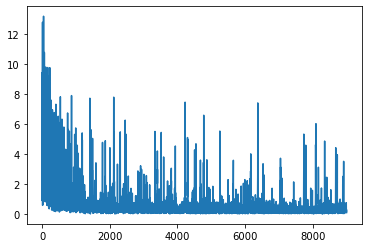

In [144]:
plt.plot(loss_record)

In [148]:
compute_error_rate(beta, X_train, y_train)

DeviceArray(0.06786667, dtype=float32)

In [149]:
compute_error_rate(beta, X_test, y_test)

DeviceArray(0.0736, dtype=float32)